<a href="https://colab.research.google.com/github/tatafitz/CNN/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22homework_2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

В этом домашнем задании перед вами стоит задача научиться по фотографии лица человека предсказывать его пол, расу и возраст.

[Датасет](https://susanqq.github.io/UTKFace/), который мы будем использовать состоит из 20000 фотографий лиц людей в возрасте от 0 до 116 лет! В качестве разметки имеется пол (male/female), раса (white/black/asian/indian/other) и возраст. Классификация с настолько сильной внутриклассовой изменьчивостью (от младенцев до пожилых людей!) -- очень сложная задача. 
![alt text](https://susanqq.github.io/UTKFace/icon/samples.png)

Мы немного упростим себе задачу и воспользуемся версией датасета, где все картинки приведены к одному размеру и лица находятся в центре изображения.

Как решать такую задачу? Мы предлагаем вам воспользоваться **transfer learning и finetuning**. Т.е. взять за основу сеть, обученную на большом количестве данных для другой задачи и дообучить ее для нашей задачи.

*Это достаточно объемное и сложное домашнее задание, но не пугайтесь --  вы уже обладаете всеми знаниями, которые необходимы для его решения. Отметим, что уметь дообучить сеть является необходимим навыком на практике.*

## Задание 1

Датасетом, с которого чаще всего "переносят" знания, является известный нам ImageNet. Работая над классификатором кошек и собак на прошлом уроке мы воспользовались именно им. В этом задании мы возьмем за основу сеть, которая была обучена на датасете [VGGFace2](http://www.robots.ox.ac.uk/~vgg/data/vgg_face2/) для классификации лиц. Он содержит 3.3 миллиона изображений с 9000 разными персоналиями. **Почему мы сделали выбор в пользу VGGFace2?**

**ВПИШИТЕ ОТВЕТ ЗДЕСЬ**

**-----**

*Возможный ответ: Датасет VGGFace2 гораздо ближе к нашей задаче. Значит, признаки которые он научился извлекать из изображений будут нам горазддо полезне и помогут обучить модель лучше и быстрее*

**-----**




А теперь перейдем к практической части домашнего задания. Для начала загрузим модель, которую будем дообучать -- это мы сделали за вас. Пожалуйста, просмотрите код и комментарии внимательно.

## Загрузка обученной модели

Сеть, которую мы будем дообучать мы возьмем из открытого источника: https://github.com/rcmalli/keras-vggface .

In [ ]:
! pip install git+https://github.com/rcmalli/keras-vggface.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-8xpyp9bj
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-8xpyp9bj
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8325 sha256=7030f82df760916e4989ef1eded9cb93dded033e10b3765d5ae6adedeec1e834
  Stored in directory: /tmp/pip-ephem-wheel-cache-id94hnfs/wheels/24/de/3d/9a0fad8c64abbc63b7fb8ddcdf1aa0a4c04a98d7936e989a29
Successfully built keras-vggface


In [ ]:
!pip install git+https://github.com/DavidDoukhan/keras-vggface.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/DavidDoukhan/keras-vggface.git to /tmp/pip-req-build-7unpxp2j
  Running command git clone -q https://github.com/DavidDoukhan/keras-vggface.git /tmp/pip-req-build-7unpxp2j
     |████████████████████████████████| 50 kB 6.7 MB/s 
  Created wheel for keras-vggface: filename=keras_vggface-0.6_vddk_0.1-py3-none-any.whl size=8455 sha256=f5dec3c526f37f3597ae6e7edae83551ce7a1a17227d5e65bf1b3ddb0cc88208
  Stored in directory: /tmp/pip-ephem-wheel-cache-lkagr3d0/wheels/95/e6/a7/71aedcf836a22d207dfc9c02b0bbb03294aa1be2d29a4c4a11
Failed to build keras-vggface
  Attempting uninstall: keras-vggface
    Found existing installation: keras-vggface 0.6
    Uninstalling keras-vggface-0.6:
      Successfully uninstalled keras-vggface-0.6
    Running setup.py install for keras-vggface ... done
  DEPRECATION: keras-vggface was installed using the legacy 'setup.py install' method, be

In [ ]:
import tensorflow as tf
# tf.enable_eager_execution()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Т.к. мы решили воспользоваться чужой моделью, нам нужно сначала понять как с ней взаимодействовать. Для этого авторы часто прикладывают пример использования своих моделей. Его можно найти в README у автора репозитория.

In [ ]:
# код из https://github.com/rcmalli/keras-vggface/blob/master/README.md
# при выполнении вызовет ошибку -- это нормально

from keras_vggface.vggface import VGGFace

vggface_model = VGGFace(model='resnet50') # or VGGFace() as default

165445632/165439116 [==============================] - 42s 0us/step


Ошибка появляется потому что, пример из репозитория не использует режим eager_execution, который мы всегда включали в своих примерах для удобства разработки и соответствия новым стандартам tensorflow. 

Но это не проблема. Мы за вас заранее выполнили код выше без eager_execution и сохранили модель с помощью save_model. Она находится по адресу: https://drive.google.com/open?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO . Загрузим модель:


In [ ]:
! pip install gdown
import gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Модель загружена, а теперь посмотрим, что она из себя представляет. Это архитектура -- ResNet. На самом деле внутренности модели не очень важны для нас -- в дальнейшем мы заморозим бОльшую часть этой сети и будем рабоать только с последними слоями. Нам важно, что она обучена и мы имеем доступ к ее архитектуре и весам.

In [ ]:
vggface_model.summary() # последний слой классифицирует на 8631 классов

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                  

Для проверки того, что помимо архитектуры мы правильно загрузили веса, проверим предсказания модели на следующем изображении: 

In [ ]:
! wget https://img.joinfo.ua/i/2019/01/5c4ea940d2b08.jpg -O brad_pitt.jpg

--2023-01-03 16:11:46--  https://img.joinfo.ua/i/2019/01/5c4ea940d2b08.jpg
Resolving img.joinfo.ua (img.joinfo.ua)... 104.21.83.52, 172.67.214.206, 2606:4700:3033::6815:5334, ...
Connecting to img.joinfo.ua (img.joinfo.ua)|104.21.83.52|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://img.joinfo.com/i/2019/01/5c4ea940d2b08.jpg [following]
--2023-01-03 16:11:47--  https://img.joinfo.com/i/2019/01/5c4ea940d2b08.jpg
Resolving img.joinfo.com (img.joinfo.com)... 104.21.73.131, 172.67.162.235, 2606:4700:3031::6815:4983, ...
Connecting to img.joinfo.com (img.joinfo.com)|104.21.73.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43154 (42K) [image/jpeg]
Saving to: ‘brad_pitt.jpg’

brad_pitt.jpg       100%[===================>]  42.14K  --.-KB/s    in 0.001s  

2023-01-03 16:11:47 (37.8 MB/s) - ‘brad_pitt.jpg’ saved [43154/43154]



После загрузки запустим полный пример из репозитория:

1351680/1346516 [==============================] - 0s 0us/step


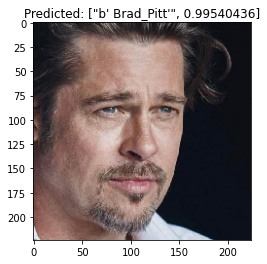

In [ ]:
from keras_vggface import utils
from tensorflow.keras.preprocessing import image

img = image.load_img("brad_pitt.jpg", target_size=(224, 224)) # модель работает с картинками размера 224 на 224
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=2) # мы используем resnet50 -- поэтому version2. Эта функция нам еще пригодится!

preds = vggface_model.predict(x) # модель -- известная нам keras model, вызываем predict
plt.title(f"Predicted: {utils.decode_predictions(preds)[0][0]}") # используем  decode_predictions из keras_vggface
plt.imshow(img)

## Загрузка данных
Мы убедились, что модель загружена правильно, узнали какой препроцессинг ей необходим (utils.preprocess_input(x, version=2)) и теперь можем перейти к загрузке наших данных.

In [ ]:
from pathlib import Path
from collections import Counter

In [ ]:
url = 'https://drive.google.com/uc?id=1mux7xiP4NP6AUUFvUW42RgSdUEQ4k5e2'
output = 'train_val_split_utk.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1mux7xiP4NP6AUUFvUW42RgSdUEQ4k5e2
To: /content/train_val_split_utk.csv
100%|██████████| 1.08M/1.08M [00:00<00:00, 69.9MB/s]


'train_val_split_utk.csv'

In [ ]:
import zipfile

In [ ]:
! wget 'https://drive.google.com/uc?export=download&confirm=no_antivirus&id=11S0ENEi0wwtoXhOP1VhNMSUwWaMpajVh' -O segment.zip

--2023-01-03 16:12:00--  https://drive.google.com/uc?export=download&confirm=no_antivirus&id=11S0ENEi0wwtoXhOP1VhNMSUwWaMpajVh
Resolving drive.google.com (drive.google.com)... 74.125.24.100, 74.125.24.139, 74.125.24.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.24.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s59fdgu3soqu5gljul81gibku2orsq5v/1672762275000/16579428900001760521/*/11S0ENEi0wwtoXhOP1VhNMSUwWaMpajVh?e=download&uuid=07c3e5dc-69ec-409f-a7e4-c7dc03650e20 [following]
--2023-01-03 16:12:02--  https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s59fdgu3soqu5gljul81gibku2orsq5v/1672762275000/16579428900001760521/*/11S0ENEi0wwtoXhOP1VhNMSUwWaMpajVh?e=download&uuid=07c3e5dc-69ec-409f-a7e4-c7dc03650e20
Resolving doc-14-3c-docs.googleusercontent.com (doc-14-3c-docs.googleusercontent.com)... 142.

In [ ]:
with zipfile.ZipFile('/content/segment.zip') as zf:
  zf.extractall()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_folder = Path("/content/UTKFace")
filenames = list(map(lambda x: x.name, data_folder.glob('*.jpg')))
print(len(filenames))
print(filenames[:3]) # имя файла содержит возраст, индекс пола и расы, перечисленные через нижнее подчеркивание

23708
['30_1_0_20170117131108776.jpg.chip.jpg', '26_1_2_20170116180302912.jpg.chip.jpg', '28_1_3_20170119195104970.jpg.chip.jpg']


In [ ]:
# формируем датафрейм с путями и нужными классами
np.random.seed(10)
np.random.shuffle(filenames)
gender_mapping = {0: 'Male', 1: 'Female'}
race_mapping = dict(list(enumerate(('White', 'Black', 'Asian', 'Indian', 'Others'))))
age_labels, gender_labels, race_labels, correct_filenames = [], [], [], []

for filename in filenames:
    if len(filename.split('_')) != 4:
        print(f"Bad filename {filename}")
        continue

    age, gender, race, _ = filename.split('_')
    correct_filenames.append(filename)
    age_labels.append(age)
    gender_labels.append(gender)
    race_labels.append(race)
    
age_labels = np.array(age_labels, dtype=np.float32)
max_age = age_labels.max()


data = {"img_name": correct_filenames, 
        "age": age_labels / max_age, # нормализуем возраст от 0 до 1
        "race": race_labels, 
        "gender": gender_labels}
df = pd.DataFrame(data)
df.head()

Bad filename 61_1_20170109150557335.jpg.chip.jpg
Bad filename 61_1_20170109142408075.jpg.chip.jpg
Bad filename 39_1_20170116174525125.jpg.chip.jpg


,img_name,age,race,gender
0,30_1_2_20170116192249012.jpg.chip.jpg,0.258621,2,1
1,4_0_0_20170110205352445.jpg.chip.jpg,0.034483,0,0
2,42_1_3_20170109141104388.jpg.chip.jpg,0.362069,3,1
3,85_1_1_20170110183033556.jpg.chip.jpg,0.732759,1,1
4,28_1_1_20170103225945785.jpg.chip.jpg,0.241379,1,1


In [ ]:
df_split = pd.read_csv("train_val_split_utk.csv", index_col=0).set_index("img_name")
df_split.head()
df = df.set_index("img_name").join(df_split).reset_index()
df[['race', 'age']] = df[['race', 'age']].astype('float32')
df_train = df[df["is_train"] == 1]
df_val = df[df["is_train"] != 1]
print(len(df_val), len(df_train))

4759 18946


In [ ]:
df_train

,img_name,age,race,gender,is_train
0,30_1_2_20170116192249012.jpg.chip.jpg,0.258621,2.0,1,1
1,4_0_0_20170110205352445.jpg.chip.jpg,0.034483,0.0,0,1
4,28_1_1_20170103225945785.jpg.chip.jpg,0.241379,1.0,1,1
5,43_0_0_20170104205149195.jpg.chip.jpg,0.370690,0.0,0,1
7,25_1_3_20170119172028785.jpg.chip.jpg,0.215517,3.0,1,1
...,...,...,...,...,...
23700,54_0_0_20170117163733561.jpg.chip.jpg,0.465517,0.0,0,1
23701,31_1_3_20170104223314431.jpg.chip.jpg,0.267241,3.0,1,1
23702,84_0_0_20170111211153326.jpg.chip.jpg,0.724138,0.0,0,1
23703,28_0_0_20170117120226377.jpg.chip.jpg,0.241379,0.0,0,1


In [ ]:
def decode_labels(race_id, gender_id, age):
    return race_mapping[int(race_id)], gender_mapping[int(gender_id)], int(age*max_age)
def show_face(image, race_id, gender_id, age):
    plt.imshow(image)
    race, gender, age = decode_labels(race_id, gender_id, age)
    plt.title(f"Gender: {gender}, Race: {race}, Age: {age}")

Убедимся, что метки классов корректны:

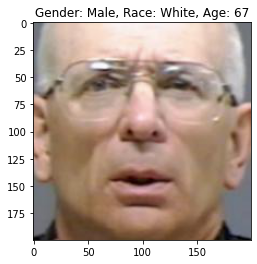

In [ ]:
row = df.iloc[np.random.randint(len(df))]
img = plt.imread(str(data_folder / row["img_name"]))
show_face(img, row["race"], row["gender"], row["age"])

Посмотрим на их распределение:

Counter({'White': 10078, 'Black': 4526, 'Indian': 3975, 'Asian': 3434, 'Others': 1692})
Counter({'Male': 12391, 'Female': 11314})


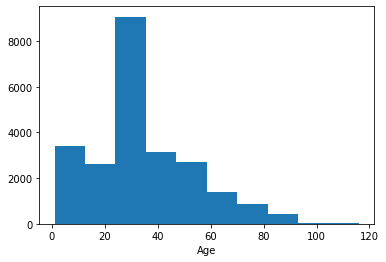

In [ ]:
races_verbose = [race_mapping[int(race)] for race in df["race"]]
genders_verbose = [gender_mapping[int(gender)] for gender in df["gender"]]
from collections import Counter
print(Counter(races_verbose))
print(Counter(genders_verbose))
_ = plt.hist(df["age"]*max_age)
_ = plt.xlabel("Age")

## Задание 2. Создание генератора данных для модели предсказания пола.
Предподготовка закончена. А теперь ваша очередь:) Мы начнем с создания модели предсказания пола. В этом задании вы должны реализовать генератор данных необходимый для последущего обучения модели. Мы предлагаем вам воспользоваться `tensorflow.keras.preprocessing.image.ImageDataGenerator`

###a) 
**Создайте генератор image_gen типа ImageDataGenerator с корректным препроцессингом, соответствующем keras_vggface.** Аугментацию использовать не нужно. 

Какой препроцессинг корректный? Как мы знаем, перед применением обученных сетей нужно знать какой препроцессинг они проводят с данными. Т.к. эта модель не часть Keras, мы должны ответить на этот вопрос сами с помощью исходников автора этой сети. К счастью, он приводит пример использования на главной странице репозитория. Видно, что он использует функцию preprocess_input из utils. Значит ей мы и должны воспользоваться!

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_input_facenet(image_):
    """
    image_ -- тензор размера (1, H, W, 3)
    
    return: картинка, с примененным preprocess_input(..., version=2) из keras_vggface (см пример с Бредом Питом)
    """
    # < YOUR CODE STARTS HERE >
    
    preprocessed = utils.preprocess_input(image_, version=1)
    
    # < YOUR CODE ENDS HERE >
    return preprocessed

# < YOUR CODE STARTS HERE >
# image_gen должен содержать ImageDataGenerator с правильной preprocessing_function

image_gen = ImageDataGenerator(preprocessing_function=preprocess_input_facenet)

# < YOUR CODE ENDS HERE >

###b)

Для генерации картинок раньше мы использовали `image_gen.flow_from_folder`. Но для этого данные должны быть расположены на диске с определенной структурой папок, что в данном случае не очень удобно. Поэтому вы должны воспользоваться более гибким `image_gen.flow_from_dataframe`, который позволяет генерировать данные с нужными классами используя датафрейм (мы его создали выше для вас).

**Ознакомьтесь с документацией по [ссылке](https://keras.io/preprocessing/image/) (раздел flow_from_dataframe) и создайте train_generator и val_generator для df_train и df_val соответственно.**
*  Генератор должен возвращать картинку и ее класс (male/female)
*  class_mode укажите "binary", directory=str(data_folder)
*  batch_size, image_size указаны ниже
*  train_generator должен перемешивать данные, а val_generator -- не должен
*  После выполнения клетки ниже вы должны увидеть текст: *Found 18946 validated image filenames belonging to 2 classes.
Found 4759 validated image filenames belonging to 2 classes.*




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 128
IMAGE_SIZE = 224
# < YOUR CODE STARTS HERE >
train_generator = image_gen.flow_from_dataframe(dataframe=df_train,
                                                x_col='img_name',
                                                y_col='gender',
                                                batch_size=BATCH_SIZE,
                                                     directory=str(data_folder),
                                                     shuffle=True,
                                                     target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                     class_mode='binary') 
val_generator = image_gen.flow_from_dataframe(dataframe=df_val,
                                                x_col='img_name',
                                                y_col='gender',
                                              batch_size=BATCH_SIZE,
                                                     directory=str(data_folder),
                                                     shuffle=False,
                                                     target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                     class_mode='binary')


# < YOUR CODE ENDS HERE >

Found 18946 validated image filenames belonging to 2 classes.
Found 4759 validated image filenames belonging to 2 classes.


In [ ]:
sample_images, sample_labels = next(val_generator)
assert sample_images.shape == (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3), "Неправильный размер батча"
assert sample_labels.shape == (BATCH_SIZE,), "Неправильный размер меток класса"
assert list(sorted(np.unique(sample_labels))) == [0., 1.], "Ожидаемые классы 0 и 1"
print("Simple tests passed")

Simple tests passed


Попробуем отобразить картинку и ее лейбл для проверки генерации:

Male


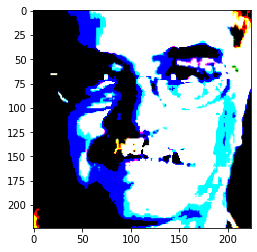

In [ ]:
plt.imshow(sample_images[5])
print(gender_mapping[int(sample_labels[5])])
# мы получим очень странное изображение и это нормально. 
# matplotlib ожидает картинку с интесивностями от 0 до 1 если она типа float и от 0 до 255 если int.

In [ ]:
print(sample_images[100].max(), sample_images[100].min()) # можно увидеть что значения яркостей типа float и в т.ч. отрицательные

143.23761 -129.1863


###с)
**Реализуйте функцию `deprocess_image`, которая преобразует картинку исользуемую keras_vggface обратно к изображению, которое можно визуализировать с помощью `matplotlib`.**
*  вам понадобится https://github.com/rcmalli/keras-vggface/blob/master/keras_vggface/utils.py
*  необходимо проделать операции preprocess_input в обратном порядке
*  наш случай: version=2, format="channels_last"

Male


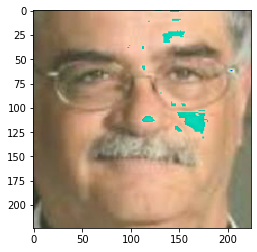

In [ ]:
def deprocess_image(vggface_image):
    """
    vggface_image -- (H, W, 3) картинка после препросессинга. 
    содержит отрицательные значения и некорректно отображается matplotlib

    return: корректно отображаеая картинка типа np.uint8(!!). 

    ! работайте с копией картинки (image = np.copy(vggface_image)) !
    """
    # < YOUR CODE STARTS HERE >
    image = np.copy(vggface_image)
    image = image[..., ::-1]
    image[..., 0] -= 93.5940
    image[..., 1] -= 104.7624
    image[..., 2] -= 129.1863
    image = np.uint8(image)
 
    
    # < YOUR CODE ENDS HERE >
    return image

# теперь картинка должна отображаться корректно
plt.imshow(deprocess_image(sample_images[5]))
print(gender_mapping[int(sample_labels[5])])

##Здание 3. Обучение модели предсказания пола

В этом задании вы должны обучить модель предсказания пола с точностью более 90% на валидационном сете. 

*   Возьмите за основу 'base_model' (определена ниже)
*   Вы должны сами решить сколько слоев замораживать и сколько полносвзяных слоев использовать. Рекомендуем начинать с модели с меньшим числом обучаемых параметров.
*   Используйте чекпоинты, чтобы не потерять веса лучшей модели. Они должны быть сохранены с именем "model_gender/checkpoint_best.h5"
*   Рекомендуется в model.fit(...) использовать steps_per_epoch=25, для того чтобы проверка на валидации происходила чаще и вы могли более точно отслеживать прогресс. Полная эпоха ~140 итераций.
*   За точность выше 94% -- дополнительные баллы.



In [ ]:
cpt_filename = "model_gender/checkpoint_best.h5"  
cpt_path = '/'.join(["/content/drive/MyDrive", cpt_filename])
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
# для начала "отрежем" от vggface_model последний слой классификатора 
# теперь для картинки base_model предсказывает 2048-мерный вектор признаков.

base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten").output)
base_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                             

In [ ]:
!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# < YOUR CODE STARTS HERE >
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


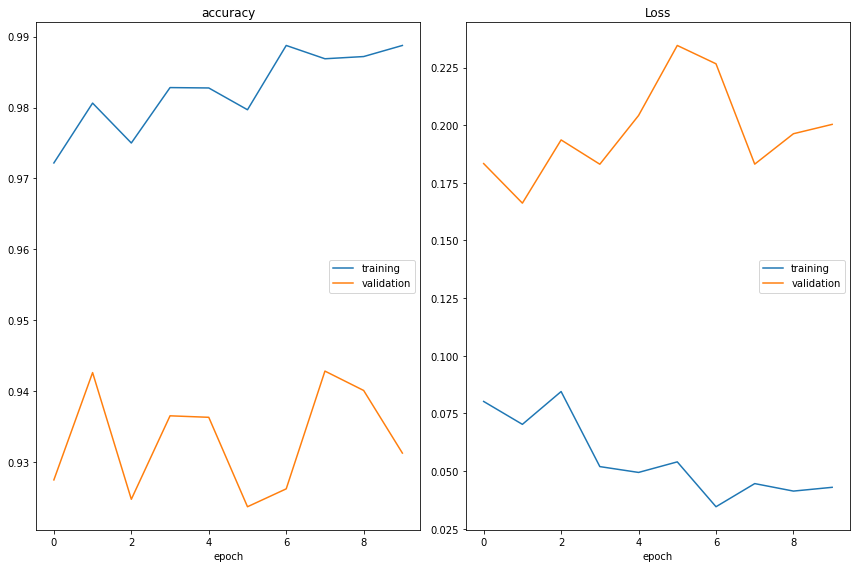

accuracy
	training         	 (min:    0.972, max:    0.989, cur:    0.989)
	validation       	 (min:    0.924, max:    0.943, cur:    0.931)
Loss
	training         	 (min:    0.035, max:    0.084, cur:    0.043)
	validation       	 (min:    0.166, max:    0.235, cur:    0.200)

Epoch 10: val_accuracy did not improve from 0.94285
25/25 [==============================] - 45s 2s/step - loss: 0.0430 - accuracy: 0.9887 - val_loss: 0.2004 - val_accuracy: 0.9313


In [ ]:
EPOCHS = 10
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    steps_per_epoch=25,
    callbacks=[PlotLossesCallback(), checkpoint])
# < YOUR CODE ENDS HERE >

In [ ]:
model_gender =tf.keras.models.load_model('/content/drive/MyDrive/model_gender/checkpoint_best.h5')
loss, acc = model_gender.evaluate(val_generator)
if acc < 0.9:
    print("Please, try harder!")
else:
    if acc >= 0.94:
        print("Well done!")
    else:
        print("Very good! Can you improve accuracy?")

38/38 [==============================] - 14s 353ms/step - loss: 0.1831 - accuracy: 0.9428
Well done!


In [ ]:
#@title (вспомогательный код, выполните клетку)
def show_faces(images, real_race=None, real_gender=None, real_age=None, 
               predicted_race=None, predicted_gender=None, predicted_age=None):
    plt.figure(figsize=(10,10))
    labels = {"Gender": [predicted_gender, real_gender],
                  "Race": [predicted_race, real_race],
                  "Age": [predicted_age, real_age]}
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(deprocess_image(images[i]))
        real_str = "Real:"
        pred_str = "Pred:"
        correct = True
        for name, (predicted, real) in labels.items():
            if predicted is None:
                continue
            if name == "Age":
                real_age = int(real[i]*int(max_age))
                predicted_age = int(predicted[i]*max_age)
                real_str += f"{real_age}"
                pred_str += f"{predicted_age}"
                if np.abs(predicted_age - real_age) > 6:
                    correct = False

            elif name == "Gender":
                real_gender = int(real[i])
                predicted_gender = int(predicted[i] > 0.5)
                real_str += f"{gender_mapping[real_gender]}, "
                pred_str += f"{gender_mapping[predicted_gender]}, "
                if real_gender != predicted_gender:
                    correct = False
            elif name == "Race":
                real_race = int(real[i])
                predicted_race = np.argmax(predicted[i])
                real_str += f"{race_mapping[real_race]}, "
                pred_str += f"{race_mapping[predicted_race]}, "
                if real_race != predicted_race:
                    correct = False
                
        title_obj = plt.title(f"{real_str}\n{pred_str}")
            
        plt.subplots_adjust(wspace=0.4)
        if not correct:
            plt.setp(title_obj, color='r')
        

4/4 [==============================] - 0s 100ms/step


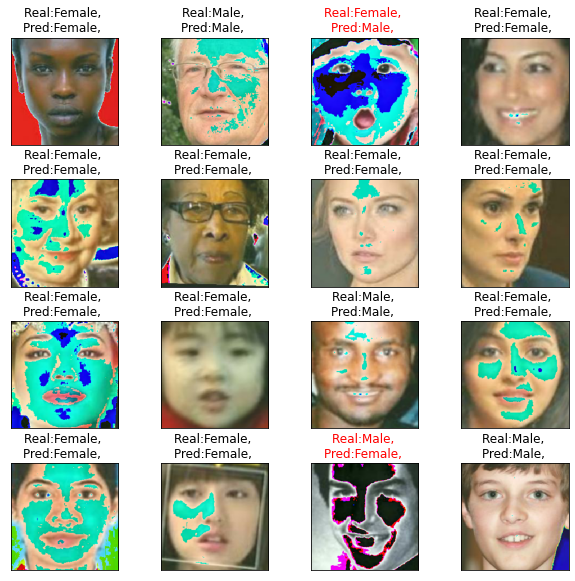

In [ ]:
sample_validation_images, sample_validation_labels = next(val_generator)
predicted = model_gender.predict(sample_validation_images)
show_faces(sample_validation_images, real_gender=sample_validation_labels, predicted_gender=predicted)

##Здание 4. Обучение модели предсказания расы

В этом задании вы должны обучить модель предсказания расы с точностью более 80% на валидационном сете. 

*   Используя код аналогичный тому, что выше, реализуйте модель предсказания расы
*   Для начала определите генератор данных
    *  нужно указать class_mode="sparse" и изменить "y_col"
*   Используйте чекпоинты, чтобы не потерять веса лучшей модели. Они должны быть сохранены с именем "model_race/checkpoint_best.h5"
*   За точность выше 85% -- дополнительные баллы.



In [ ]:
# < YOUR CODE STARTS HERE >
BATCH_SIZE = 128
IMAGE_SIZE = 224
# < YOUR CODE STARTS HERE >
train_generator = image_gen.flow_from_dataframe(dataframe=df_train,
                                                x_col='img_name',
                                                y_col='race',
                                                batch_size=BATCH_SIZE,
                                                     directory=str(data_folder),
                                                     shuffle=True,
                                                     target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                     class_mode='sparse') 
val_generator = image_gen.flow_from_dataframe(dataframe=df_val,
                                                x_col='img_name',
                                                y_col='race',
                                              batch_size=BATCH_SIZE,
                                                     directory=str(data_folder),
                                                     shuffle=False,
                                                     target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                     class_mode='sparse')

Found 18946 validated image filenames belonging to 5 classes.
Found 4759 validated image filenames belonging to 5 classes.


In [ ]:
cpt_filename = "model_race/checkpoint_best.h5"  
cpt_path = '/'.join(["/content/drive/MyDrive", cpt_filename])
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
base_model_2 = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_7").output)

In [ ]:
# Обучение модели предсказания расы
model = tf.keras.Sequential([
  base_model_2,
  tf.keras.layers.Dense(5, activation='softmax')
])
scce = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss=scce,
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


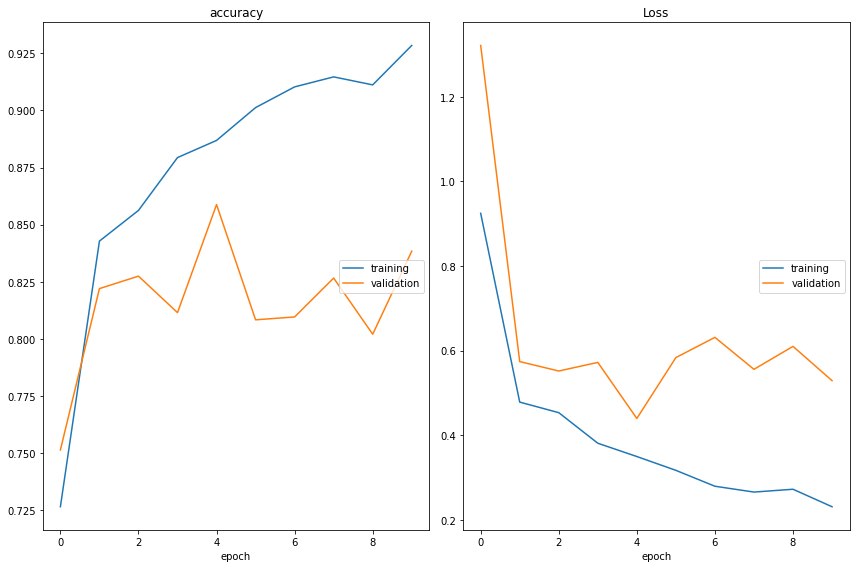

accuracy
	training         	 (min:    0.727, max:    0.928, cur:    0.928)
	validation       	 (min:    0.751, max:    0.859, cur:    0.838)
Loss
	training         	 (min:    0.231, max:    0.925, cur:    0.231)
	validation       	 (min:    0.440, max:    1.322, cur:    0.529)

Epoch 10: val_accuracy did not improve from 0.85879
25/25 [==============================] - 46s 2s/step - loss: 0.2310 - accuracy: 0.9284 - val_loss: 0.5292 - val_accuracy: 0.8384


In [ ]:
EPOCHS = 10
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    steps_per_epoch=25,
    callbacks=[PlotLossesCallback(), checkpoint])
# < YOUR CODE ENDS HERE >

In [ ]:
model_race = tf.keras.models.load_model("/content/drive/MyDrive/model_race/checkpoint_best.h5")
loss, acc = model_race.evaluate(val_generator)
if acc < 0.8:
    print("Please, try harder!")
else:
    if acc >= 0.85:
        print("Well done!")
    else:
        print("Very good! Can you improve accuracy?")

38/38 [==============================] - 14s 353ms/step - loss: 0.4397 - accuracy: 0.8588
Well done!


In [ ]:
sample_validation_images, sample_validation_labels = next(val_generator)
predicted = model_race.predict(sample_validation_images)
show_faces(sample_validation_images, real_race=sample_validation_labels, predicted_race=predicted)

## Задание 5. Multitask learning

В этом задании мы могли бы обучить регрессор возраста по картинке, используя аналогичный уже написаному код. Но вы пойдем по другому пути. 

Если на каждый атрибут (возраст, раса, пол) создавать одну модель, то таких моделей получится 3. Очевидно, что для предсказания на новой картике необходимо будет произвести инференс трех сетей. Это может быть ресурсо-затратно и сложнее в поддержке. 

Какой же есть еще подход? Он называется Multitask learning. Его идея в том, чтобы обучать одну модель для решения сразу нескольких задач! Гибкость нейронных сетей позволяет это сделать достаточно логичными образом. Необходимо вместо одной "головы" для предсказания сделать несколько. Таким образом в нашей задаче одна будет отвечать за классификацию пола (1 выход, вероятность), вторая -- за классификацию расы (5 выходов, вероятности) и третья -- за предсказания возраста (1 выход, число).

### a) 
**Реализуйте модель сети с тремя "головами".**

*    Вам нужно вспомнить что такое Functional API для определения моделей, потому что необходимо определить архитектуру с тремя выходами. С помощью Sequential API этого сделать нельзя.
*    За основу возьмите base_model (определена ниже), добавьте к ее выходу 1-2 полносвязных слоя (количество нейронов определите сами)
*    К последнему слою добавьте три паралельных выхода: два с одним нейроном и один с пятью
*    При определении выходных слоев обязательно укажите Dense(..., name="race"/"age"/"gender" )
*    Не забудьте про правильные активации. Т.к. возраст у нас нормирован (от 0 до 1), подумайте, какая активация ему подойдет
*    Порядок выходов модели: `outputs=[gender_output, race_output, age_output]`
*    Точность предсказания пола должна быть > 90%, расы > 80% а MAE для возраста < 0.09.

In [ ]:
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten").output)
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                           

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_1 (Functional)           (None, 2048)         23561152    ['input_2[0][0]']                
                                                                                                  
 Layer_last1 (Dense)            (None, 2500)         5122500     ['model_1[0][0]']                
                                                                                                  
 Layer_last2 (Dense)            (None, 2000)         5002000     ['Layer_last1[0][0]']      

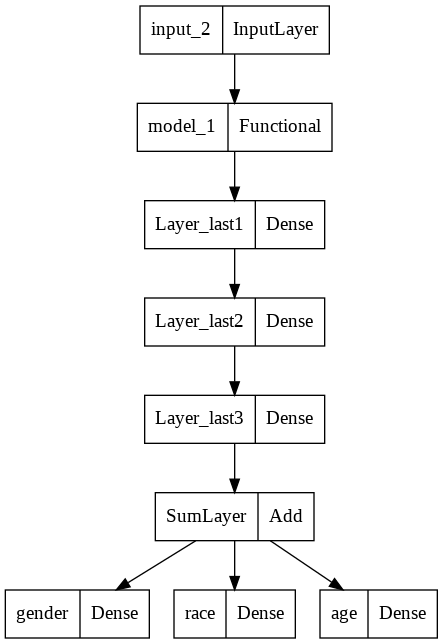

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

BATCH_SIZE = 128
IMAGE_SIZE = 224

input_layer = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
l0_output = base_model(input_layer)
# переменная model должна содержать модель для дальнейшего обучения

l1_output = tf.keras.layers.Dense(2500, name="Layer_last1", activation='relu')(l0_output)
# l2_output = tf.keras.layers.Flatten()(l1_output)
l2_output = tf.keras.layers.Dense(2000, name="Layer_last2", activation='relu')(l1_output)
l3_output = tf.keras.layers.Dense(1800, name="Layer_last3", activation='relu')(l2_output)
# l4_output = tf.keras.layers.Dense(1800, name="Layer_last4", activation='relu')(l3_output)
# специальный слой, который сложит выходы всех слоев, которые ему передали
sum_output = tf.keras.layers.Add(name="SumLayer")([l3_output])

# выходной слой
output_gender = tf.keras.layers.Dense(1, name="gender", activation='sigmoid')(sum_output)
output_race = tf.keras.layers.Dense(5, name="race", activation='softmax')(sum_output)
output_age = tf.keras.layers.Dense(1, name="age", activation='sigmoid')(sum_output)
# дальше будем определять чуть компактнее


# создаем модель. нужно показать что мы считаем входом в нашу модель, а что выходом.
model = tf.keras.Model(inputs=input_layer, outputs=[output_gender, output_race, output_age])

tf.keras.utils.plot_model(model, show_shapes=False)








# < YOUR CODE ENDS HERE >
model.summary()
plot_model(model)


In [ ]:
prediction = model(np.zeros((6, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32))
assert len(prediction) == 3, "Модель должна возвращать три тензора"
assert prediction[0].shape == (6, 1), f"Неправильный размер выхода gender: {prediction[0].shape}"
assert prediction[1].shape == (6, 5), f"Неправильный размер выхода race: {prediction[1].shape}"
assert prediction[2].shape == (6, 1), f"Неправильный размер выхода age: {prediction[2].shape}"
print("Shape tests passed")

Shape tests passed


Ниже мы приводим необходимые генераторы данных. Обратите внимание на y_col и class_mode.


In [ ]:
from livelossplot import PlotLossesKeras

In [ ]:
train_generator = image_gen.flow_from_dataframe(
        dataframe=df_train,
        class_mode="raw",
        x_col="img_name", y_col=["gender", "race", "age"], # нас интересуют все три столбца
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
val_generator = image_gen.flow_from_dataframe(
        dataframe=df_val,
        class_mode="raw",
        x_col="img_name", y_col=["gender", "race", "age"], 
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=False)

def split_outputs(generator):
    """
    Вспомогательная функция, которая модернизирует генераторы картинок, чтобы их
    можно было использовать для Мultitask
    image_gen.flow_from_dataframe возвращает на каждой итерации батч:
    ((N, H, W, 3), (N, 3)) -- N картинок и N троек меток (для трех "задач")
    model.fit(..) ожидает генератор в формате:
    ((N, H, W, 3), [(N, 1), (N, 1), (N, 1)])

    Для такого превращения и нужна эта функция.

    """
    while True:
        data = next(generator)
        image = data[0]
        labels = np.split(data[1], 3, axis=1) #выделяем набор всех 3 меток, дальше выделять каждую метку не нужно
        labels = np.array(labels).astype('float32')
        labels = [labels[0].reshape((len(labels[0]),)),
                  labels[1].reshape((len(labels[1]),)),
                  labels[2].reshape((len(labels[2]),))]
        yield image, labels


# def split_outputs(generator):
#     """
#     Вспомогательная функция, которая модернизирует генераторы картинок, чтобы их
#     можно было использовать для Мultitask
#     image_gen.flow_from_dataframe возвращает на каждой итерации батч:
#     ((N, H, W, 3), (N, 3)) -- N картинок и N троек меток (для трех "задач")
#     model.fit(..) ожидает генератор в формате:
#     ((N, H, W, 3), [(N, 1), (N, 1), (N, 1)])

#     Для такого превращения и нужна эта функция.

#     """
#     while True:
#         data = next(generator)
#         image = data[0]
#         labels = np.split(data[1], 3, axis=1)
#         labels = [labels[0].reshape((len(labels[0]),)),
#                   labels[1].reshape((len(labels[1]),)),
#                   labels[2].reshape((len(labels[2]),))]
#         
#         yield image, labels

Found 18946 validated image filenames.
Found 4759 validated image filenames.


In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


А теперь перейдем к обучению:

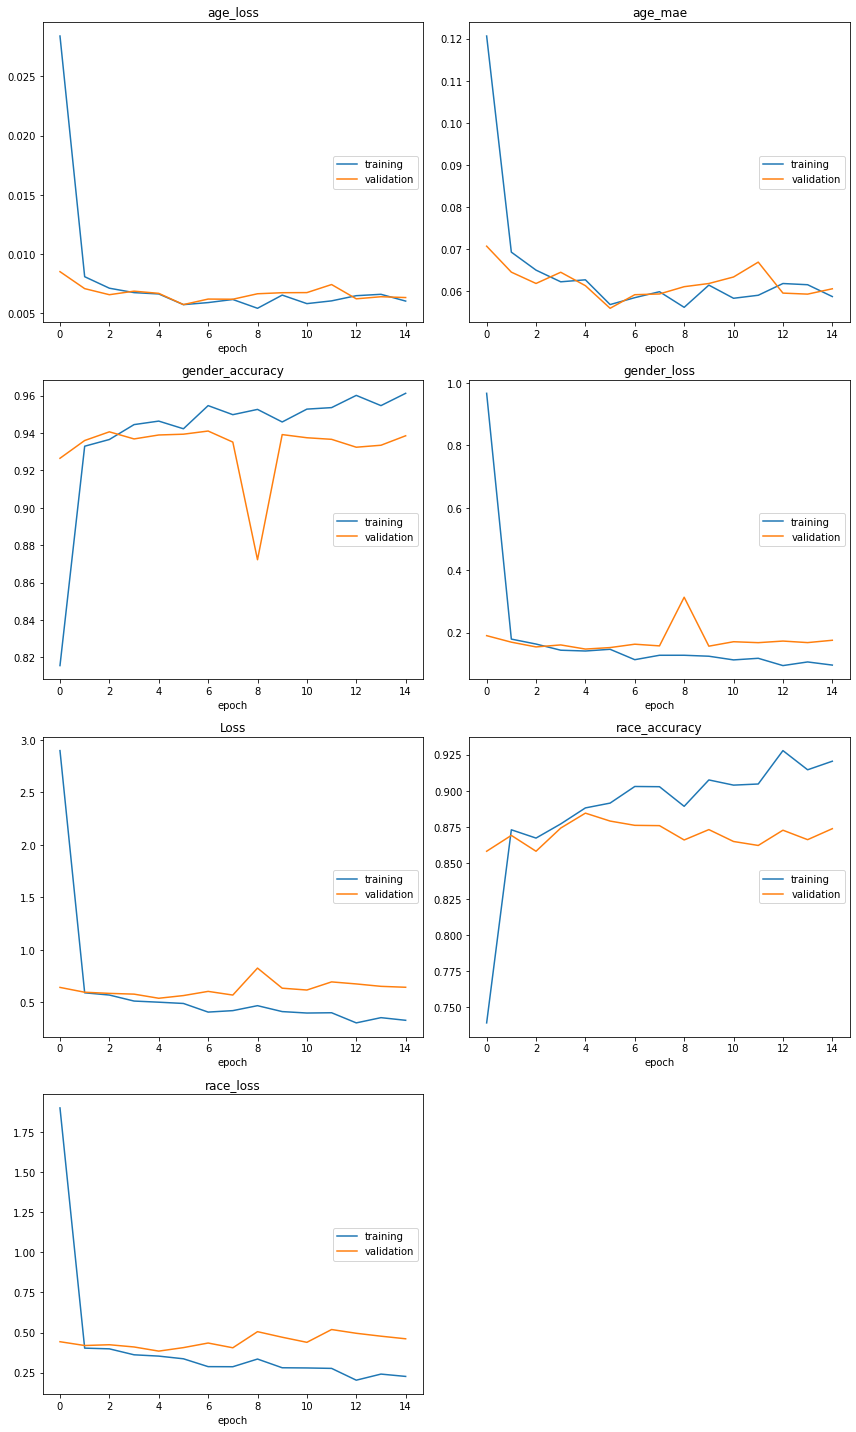

age_loss
	training         	 (min:    0.005, max:    0.028, cur:    0.006)
	validation       	 (min:    0.006, max:    0.009, cur:    0.006)
age_mae
	training         	 (min:    0.056, max:    0.121, cur:    0.059)
	validation       	 (min:    0.056, max:    0.071, cur:    0.061)
gender_accuracy
	training         	 (min:    0.816, max:    0.961, cur:    0.961)
	validation       	 (min:    0.872, max:    0.941, cur:    0.939)
gender_loss
	training         	 (min:    0.094, max:    0.967, cur:    0.096)
	validation       	 (min:    0.147, max:    0.313, cur:    0.175)
Loss
	training         	 (min:    0.303, max:    2.897, cur:    0.328)
	validation       	 (min:    0.538, max:    0.825, cur:    0.642)
race_accuracy
	training         	 (min:    0.739, max:    0.928, cur:    0.920)
	validation       	 (min:    0.858, max:    0.885, cur:    0.874)
race_loss
	training         	 (min:    0.203, max:    1.902, cur:    0.226)
	validation       	 (min:    0.384, max:    0.519, cur:    0.461)

E

In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # вы можете выбрать другую скорость обучения для вашей модели

# обратите внимание, что теперь loss -- это словарь, в котором к каждому выходу мы "прицепляем" свой лосс
# аналогично с metrics
model.compile(optimizer=optimizer, 
              loss={'gender': 'binary_crossentropy', 'race': 'sparse_categorical_crossentropy', 'age': 'mse'},
              metrics={'gender': 'accuracy', 'race': 'accuracy', 'age': 'mae'})


# path = Path("model_multitask")
# path.mkdir(exist_ok=True)
cpt_filename = "model_multitask/checkpoint_best.h5"
cpt_path = '/'.join(["/content/drive/MyDrive", cpt_filename])
# cpt_path =str(path / cpt_filename)

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_age_mae', verbose=1, save_best_only=True, mode='min')

model.fit(split_outputs(train_generator), epochs=15, validation_data=split_outputs(val_generator),
                    callbacks=[PlotLossesKeras(), checkpoint], steps_per_epoch=50, 
                    validation_steps= len(df_val) // BATCH_SIZE)

In [ ]:
# model_multitask = tf.keras.models.load_model("/content/drive/MyDrive/model_multitask/checkpoint_best.h5")
val_generator = image_gen.flow_from_dataframe(
        dataframe=df_val,
        class_mode="raw",
        x_col="img_name", y_col=["gender", "race", "age"], 
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=False)
results = model.evaluate(split_outputs(val_generator), steps=len(df_val)//BATCH_SIZE)
# print(results)
assert results[-3] > 0.90, f"Gender accuracy is too low. Please try to improve it {results[-3]}"
assert results[-2] > 0.80, f"Race accuracy is too low. Please try to improve it. {results[-2]}"
assert results[-1] < 0.09, f"Age MAE it too high: {results[-1]}"
print("Well done!")

Found 4759 validated image filenames.
37/37 [==============================] - 13s 361ms/step - loss: 0.6424 - gender_loss: 0.1752 - race_loss: 0.4609 - age_loss: 0.0063 - gender_accuracy: 0.9386 - race_accuracy: 0.8737 - age_mae: 0.0606
Well done!


4/4 [==============================] - 0s 99ms/step


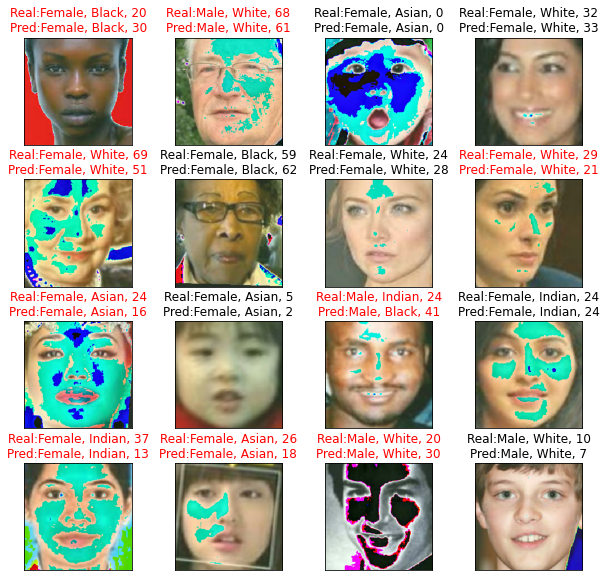

In [ ]:
sample_validation_images, sample_validation_labels = next(split_outputs(val_generator))
predicted = model.predict(sample_validation_images)
show_faces(sample_validation_images, 
           real_gender=sample_validation_labels[0], predicted_gender=predicted[0],
           real_race=sample_validation_labels[1], predicted_race=predicted[1],
           real_age=sample_validation_labels[2].flatten(), predicted_age=predicted[2].flatten(),
           )

###b)
Загрузите любое лицо и получите предсказание. Не забудьте его обрезать соответствующим образом. Результат сети не оценивается.

In [ ]:
! wget https://cdnn1.img.sputnik.tj/img/07e6/0c/1f/1053948999_0:155:3164:1936_1920x0_80_0_0_847f06f5504c95fe30faa26d0eb977a9.jpg.webp -O put.jpg

--2023-01-03 16:53:28--  https://cdnn1.img.sputnik.tj/img/07e6/0c/1f/1053948999_0:155:3164:1936_1920x0_80_0_0_847f06f5504c95fe30faa26d0eb977a9.jpg.webp
Resolving cdnn1.img.sputnik.tj (cdnn1.img.sputnik.tj)... 185.40.155.13
Connecting to cdnn1.img.sputnik.tj (cdnn1.img.sputnik.tj)|185.40.155.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/webp]
Saving to: ‘put.jpg’

put.jpg                 [ <=>                ]  63.25K   325KB/s    in 0.2s    

2023-01-03 16:53:31 (325 KB/s) - ‘put.jpg’ saved [64766]



Downloading...
From: https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1UAgE3qFd9_nph2NLTa6itLRH6w35BmaB
To: /content/me.jpg
100%|██████████| 4.18M/4.18M [00:00<00:00, 224MB/s]


1/1 [==============================] - 0s 25ms/step


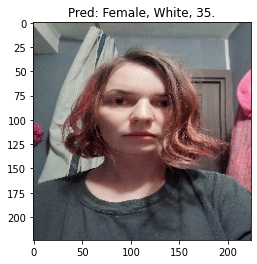

In [ ]:
url = 'https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1UAgE3qFd9_nph2NLTa6itLRH6w35BmaB'
output = 'me.jpg'
gdown.download(url, output, quiet=False)

img = image.load_img("me.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=2) 
predicted_labels = model.predict(x)
plt.imshow(img)
gender, race, age = int(predicted_labels[0][0] > 0.5), np.argmax(predicted_labels[1][0]), predicted_labels[2][0]
title_obj = f"Pred: {gender_mapping[gender]}, {race_mapping[race]}, {int(age[0]*max_age)}."
_ = plt.title(title_obj)
# я получился немного моложе :)

Downloading...
From: https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1UG4R6z3r1LHHWFCURtpAp21stZI8I3e8
To: /content/Alex.jpg
100%|██████████| 87.4k/87.4k [00:00<00:00, 102MB/s]

1/1 [==============================] - 0s 25ms/step


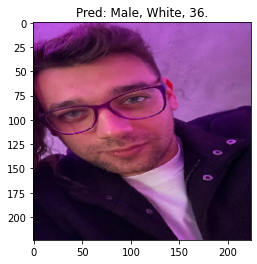

In [ ]:
url = 'https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1UG4R6z3r1LHHWFCURtpAp21stZI8I3e8'
output = 'Alex.jpg'
gdown.download(url, output, quiet=False)

img = image.load_img("Alex.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=2) 
predicted_labels = model.predict(x)
plt.imshow(img)
gender, race, age = int(predicted_labels[0][0] > 0.5), np.argmax(predicted_labels[1][0]), predicted_labels[2][0]
title_obj = f"Pred: {gender_mapping[gender]}, {race_mapping[race]}, {int(age[0]*max_age)}."
_ = plt.title(title_obj)

1/1 [==============================] - 0s 24ms/step


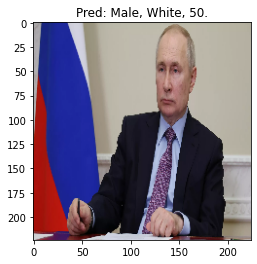

In [ ]:
# gdown.download(url, output, quiet=False)

img = image.load_img("put.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=2) 
predicted_labels = model.predict(x)
plt.imshow(img)
gender, race, age = int(predicted_labels[0][0] > 0.5), np.argmax(predicted_labels[1][0]), predicted_labels[2][0]
title_obj = f"Pred: {gender_mapping[gender]}, {race_mapping[race]}, {int(age[0]*max_age)}."
_ = plt.title(title_obj)

#Заключение 

Это было очень сложное и важное домашнее задание. Надеемся, вы с ним справились успешно и готовы к переходу к следующему модулю! Удачи!